# The Big DataCombine Engineered by BattleFin

The document
https://docs.google.com/document/d/1KYKqg6J2ceiOQDV35wSuBat0nnKbt-qG8fKTWzXEKHA/edit#heading=h.xhjdvy1vjbfl

### Load Library

In [287]:
import csv
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot

### Load Data

In [288]:
# load train data
train = list()
for x in range(1, 201):
    day = list()
    with open("data/%d.csv" % x) as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            day.append(np.array(list(map(float, row))))
    day = np.vstack(day)
    train.append(day)

pickle.dump(train, open("output/train.pkl", "wb"))    

print("train[0] shape - {}".format(train[0].shape))

train[0] shape - (55, 442)


In [289]:
# load test data
test = list()
for x in range(201, 511):
    day = list()
    with open("data/%d.csv" % x) as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            day.append(np.array(list(map(float, row))))
    day = np.vstack(day)
    test.append(day)

pickle.dump(test, open("output/test.pkl", "wb"))    

print("test[0] shape - {}".format(test[0].shape))

test[0] shape - (55, 442)


In [290]:
# load train labels
labels = list()
with open("trainLabels.csv") as file:
    reader = csv.reader(file, delimiter=",")
    next(reader)
    for row in reader:
        labels.append(np.array(list(map(float, row))[1:]))
labels = np.vstack(labels)

pickle.dump(labels, open("output/labels.pkl", "wb"))

print("labels shape - {}".format(labels.shape))

labels shape - (200, 198)


In [291]:
# make ar data set
train_ar = list()
test_ar = list()

for x in range(198):
    stock_train_ar = list()
    stock_test_ar = list()
    for y in range(len(train)):
        stock_train_ar.append(train[y][:, x])
    for y in range(len(test)):
        stock_test_ar.append(test[y][:, x])
    stock_train_ar = np.vstack(stock_train_ar)
    stock_test_ar = np.vstack(stock_test_ar)
    train_ar.append(stock_train_ar)
    test_ar.append(stock_test_ar)

pickle.dump((train_ar, test_ar), open("output/ar.pkl", "wb"))

print("train_ar len - {}".format(len(train_ar)))
print("test_ar len - {}".format(len(test_ar)))
print("train_ar[0] shape - {}".format(train_ar[0].shape))
print("test_ar[0] shape - {}".format(test_ar[0].shape))

print("train_ar[0] - {}".format(train_ar[0]))

train_ar len - 198
test_ar len - 198
train_ar[0] shape - (200, 55)
test_ar[0] shape - (310, 55)
train_ar[0] - [[ 0.    0.97  1.69 ...  2.79  2.74  2.78]
 [ 0.   -2.14 -2.23 ... -4.72 -4.51 -4.62]
 [ 0.    0.52  0.48 ...  0.04  0.1   0.02]
 ...
 [ 0.   -3.29 -3.53 ... -2.21 -2.25 -2.42]
 [ 0.    0.17  0.59 ...  0.97  0.82  0.97]
 [ 0.   -0.71 -1.06 ... -1.04 -0.95 -0.84]]


In [292]:
# make train diff data set
train_diff = list()
test_diff = list()

for x in range(198):
    stock_train_diff = list()
    stock_test_diff = list()
    for y in range(len(train)):
        day_train_diff = train[y][1:, x]
        for z in range(1, len(day_train_diff), -1):
            day_train_diff[k] = day_train_diff[k] - day_train_diff[k - 1]
        stock_train_diff.append(day_train_diff)
    for y in range(len(test)):
        day_test_diff = test[y][1:, x]
        for z in range(1, len(day_test_diff), -1):
            day_test_diff[k] = day_test_diff[k] - day_test_diff[k - 1]
        stock_test_diff.append(day_test_diff)
    stock_train_diff = np.vstack(stock_train_diff)
    stock_test_diff = np.vstack(stock_test_diff)
    train_diff.append(stock_train_diff)
    test_diff.append(stock_test_diff)
    
pickle.dump((train_diff, test_diff), open("output/diff.pkl", "wb"))

print("train_diff len - {}".format(len(train_diff)))
print("test_diff len - {}".format(len(test_diff)))
print("train_diff shape - {}".format(train_diff[0].shape))
print("test_diff shape - {}".format(test_diff[0].shape))

print("train_diff[0] - {}".format(train_diff[0]))

train_diff len - 198
test_diff len - 198
train_diff shape - (200, 54)
test_diff shape - (310, 54)
train_diff[0] - [[ 0.97  1.69  1.71 ...  2.79  2.74  2.78]
 [-2.14 -2.23 -2.32 ... -4.72 -4.51 -4.62]
 [ 0.52  0.48  0.8  ...  0.04  0.1   0.02]
 ...
 [-3.29 -3.53 -3.46 ... -2.21 -2.25 -2.42]
 [ 0.17  0.59  1.41 ...  0.97  0.82  0.97]
 [-0.71 -1.06 -1.69 ... -1.04 -0.95 -0.84]]


### EDA

In [293]:
# the last raw of stock price at 1:55 PM ET
train_last = [train[x][54, :] for x in range(len(train))]
train_last = np.vstack(train_last)

test_last = [test[x][54, :] for x in range(len(test))]
test_last = np.vstack(test_last)

### EDA by Day

In [294]:
train_stock_0 = train_ar[0][:, 54]
test_stock_0 = test_ar[0][:, 54]

stock_0 = np.hstack((train_ar[0][:, 54], test_ar[0][:, 54]))

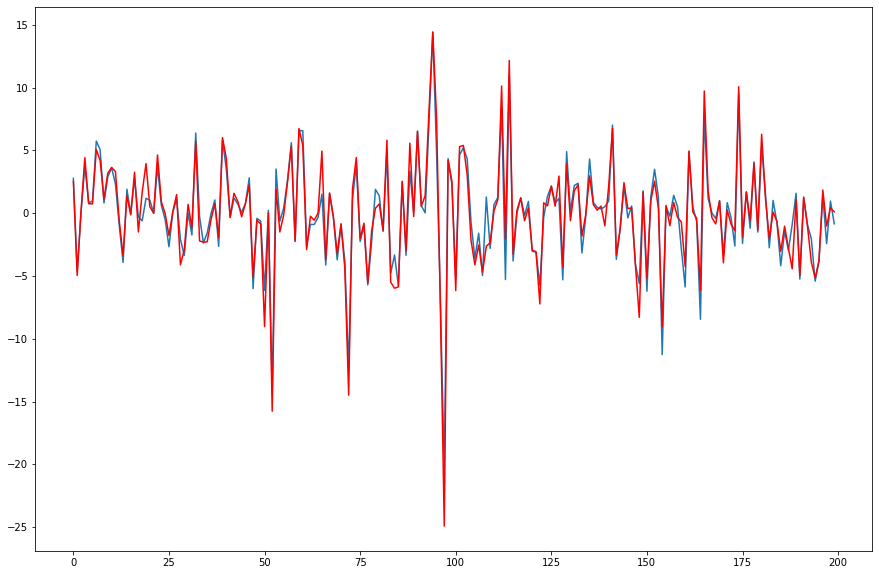

In [295]:
series = pd.Series(train_stock_0)

pyplot.figure(figsize=(15, 10))
series.plot()
pyplot.plot(labels[:,0], color='red')
pyplot.show()

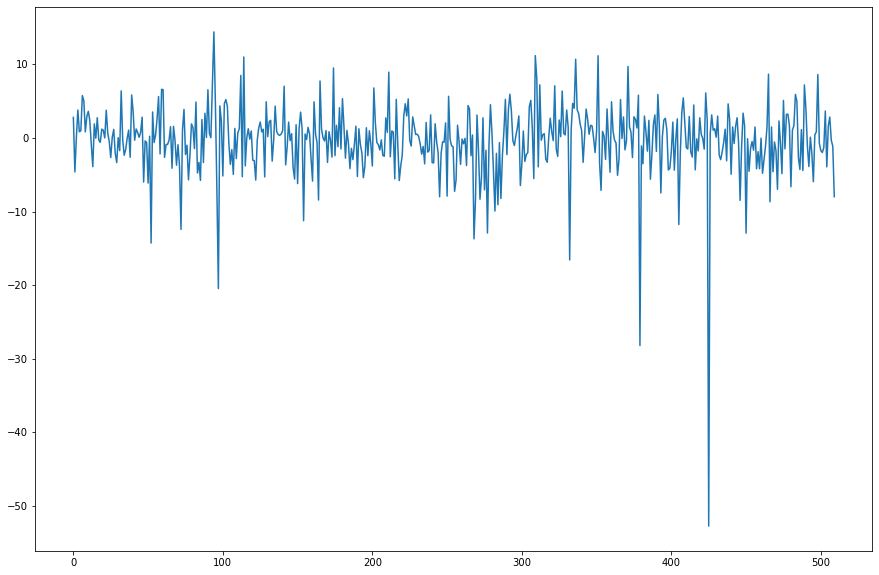

In [296]:
series = pd.Series(stock_0)

pyplot.figure(figsize=(15, 10))
series.plot()
pyplot.show()

In [297]:
train_stock_1 = train_ar[1][:, 54]
train_stock_10 = train_ar[10][:, 54]
train_stock_100 = train_ar[100][:, 54]

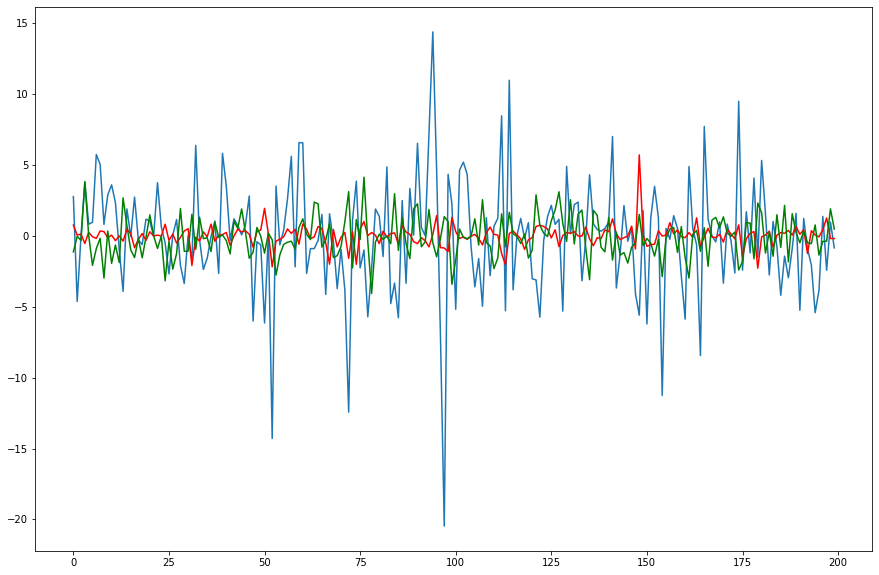

In [298]:
series_0 = pd.Series(train_stock_0)
series_1 = pd.Series(train_stock_1)
series_10 = pd.Series(train_stock_10)
series_100 = pd.Series(train_stock_100)

pyplot.figure(figsize=(15, 10))
pyplot.plot(series_0)
pyplot.plot(series_1, color='red')
pyplot.plot(series_10, color='green')
#pyplot.plot(series_100, color='purple')
pyplot.show()

# Statistic Model

### AR Model

In [260]:
def draw_acplots(stock, day):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # draw auto correlation plot
    from pandas.plotting import autocorrelation_plot

    pyplot.figure(figsize=(15, 10))
    autocorrelation_plot(series)
    pyplot.show()
    
    # draw acf plot
    from statsmodels.graphics.tsaplots import plot_acf

    plot_acf(series[:-1], lags=10)
    pyplot.show()

In [261]:
def predict_with_ar_model(stock, day, lags):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.ar_model import AutoReg

    X = series.values
    y = labels[day, stock]

    model = AutoReg(X, lags=lags, old_names=False)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(X), end=len(X) + 24, dynamic=False)
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = np.hstack((X[-1], predictions))
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

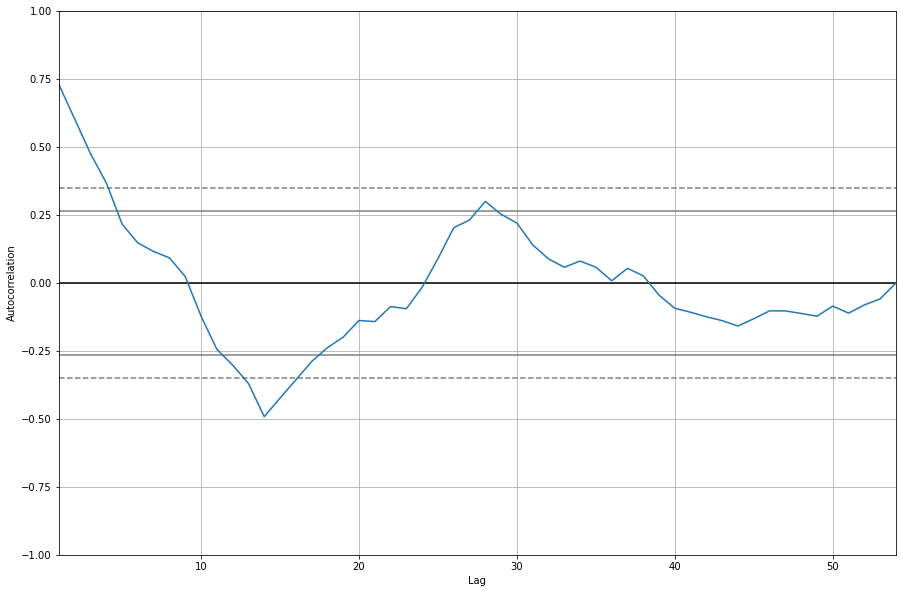

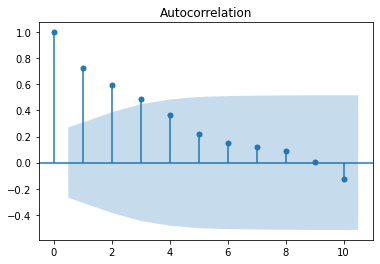

In [262]:
draw_acplots(0, 0)

prediction - 2.4652126217452732, expected - 2.53


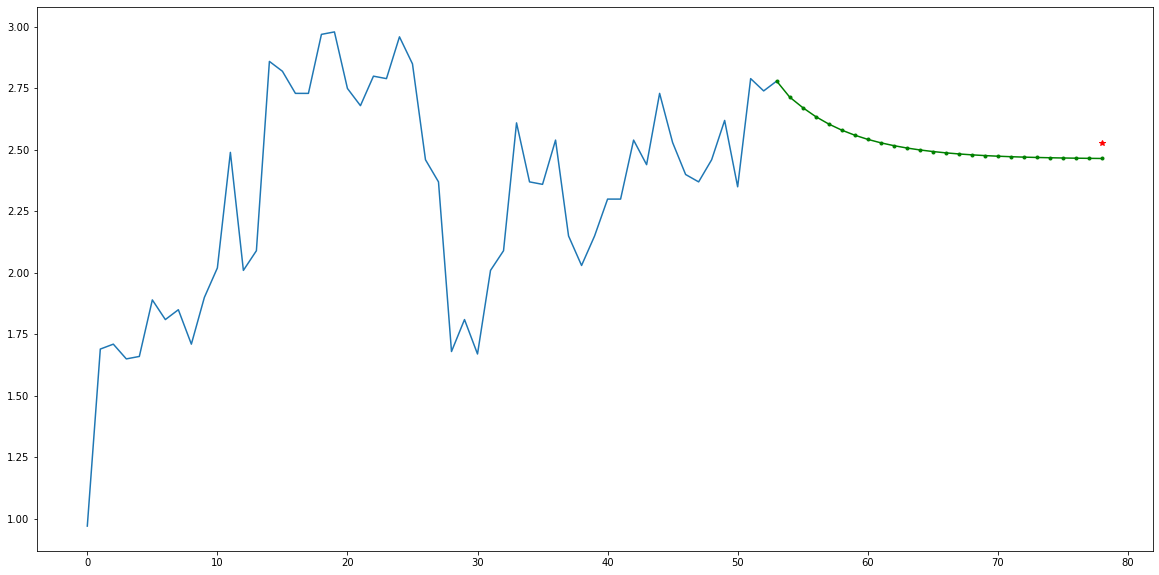

In [263]:
predict_with_ar_model(0, 0, 3)

prediction - 3.7918508033863336, expected - 3.65


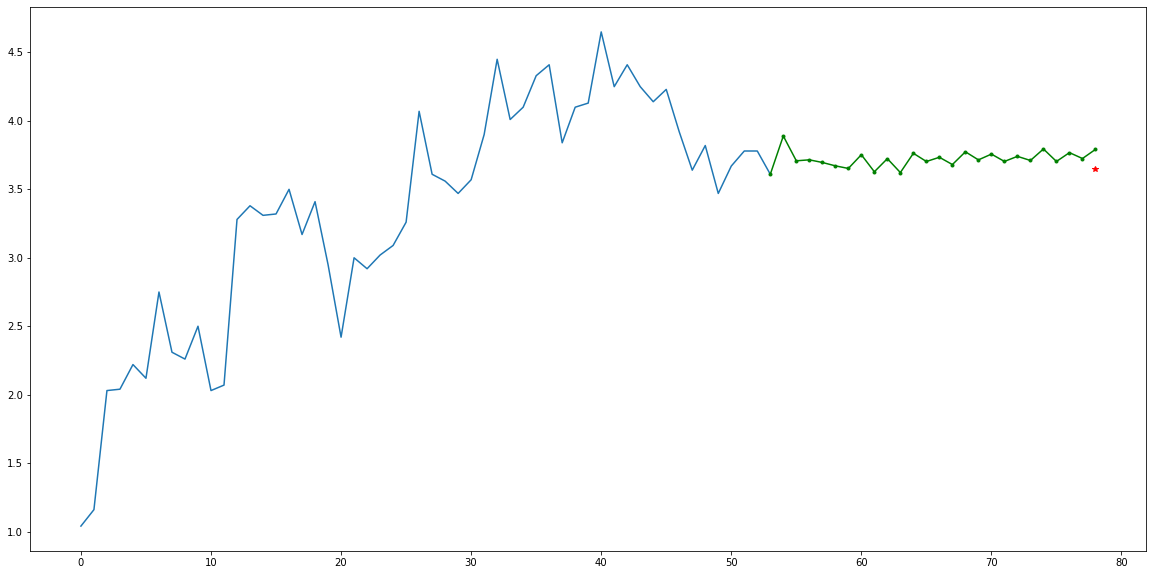

In [264]:
predict_with_ar_model(0, 10, 15)

prediction - -1.8447935335486403, expected - -1.83


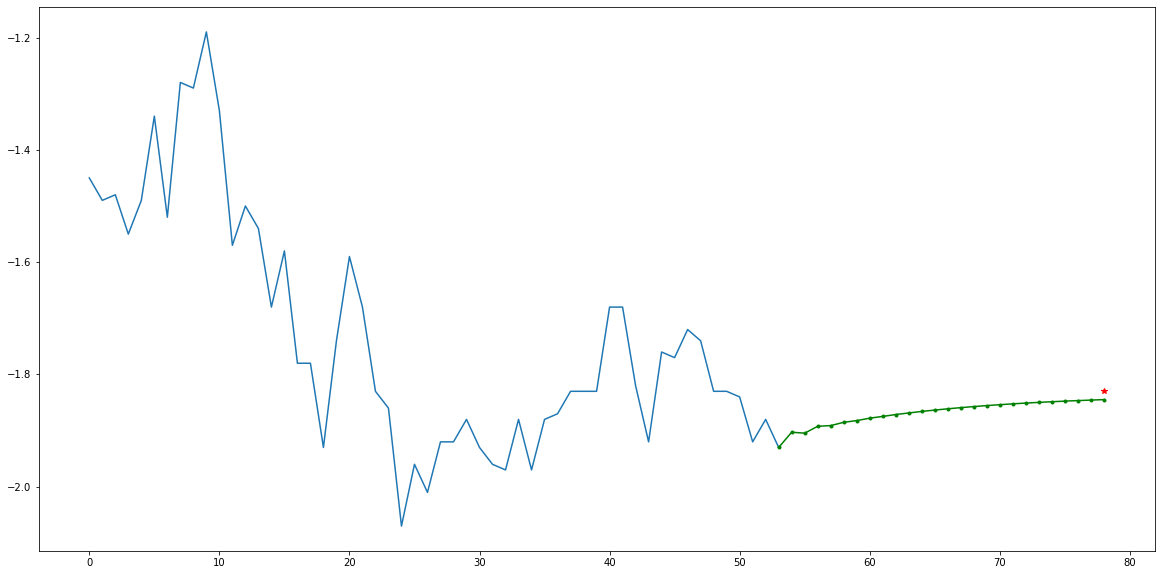

In [265]:
predict_with_ar_model(10, 10, 4)

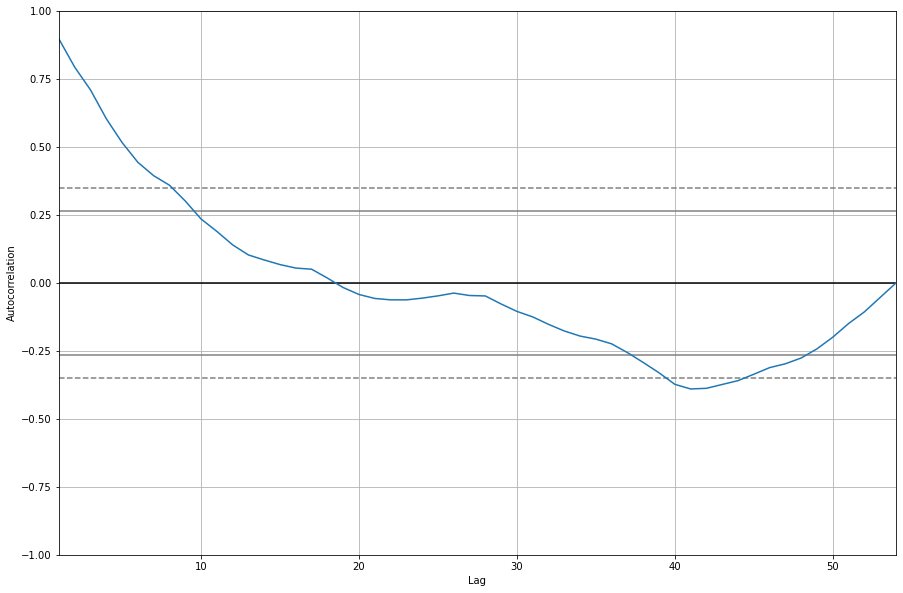

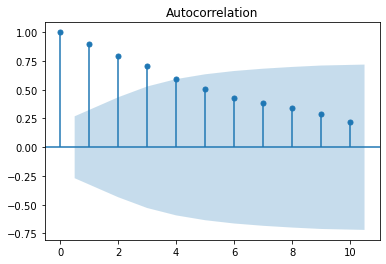

In [266]:
draw_acplots(190, 180)

prediction - 0.6828638801072505, expected - 0.83


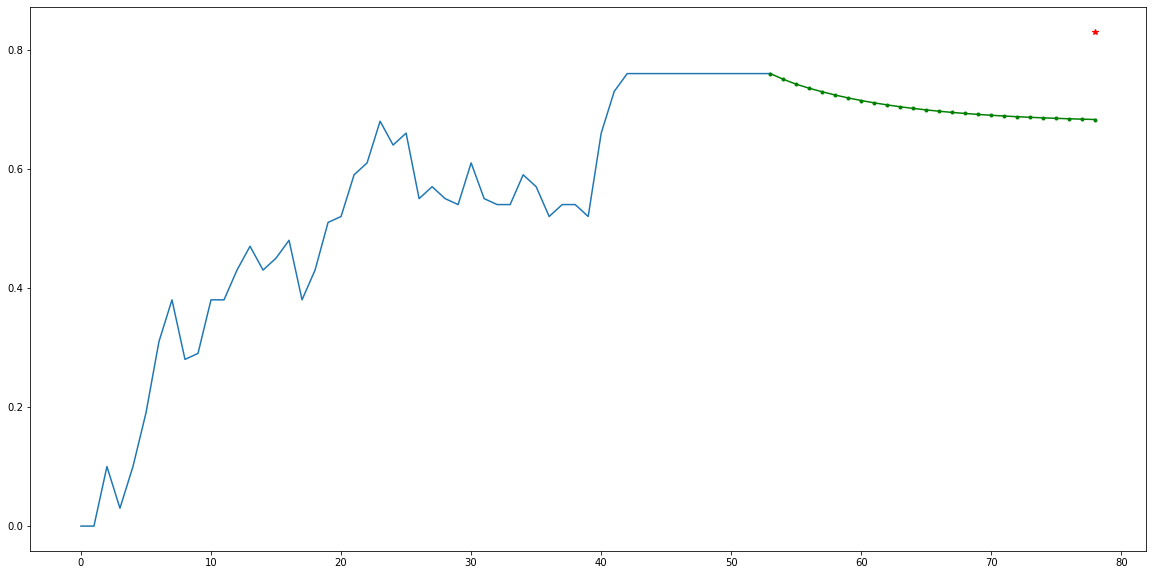

In [267]:
predict_with_ar_model(190, 180, 4)

In [268]:
def predict_with_ar_model_without_plot(stock, day, lags):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.ar_model import AutoReg

    X = series.values
    y = labels[day, stock]

    model = AutoReg(X, lags=lags, old_names=False)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(X), end=len(X) + 24, dynamic=False)
    
    return predictions[-1]

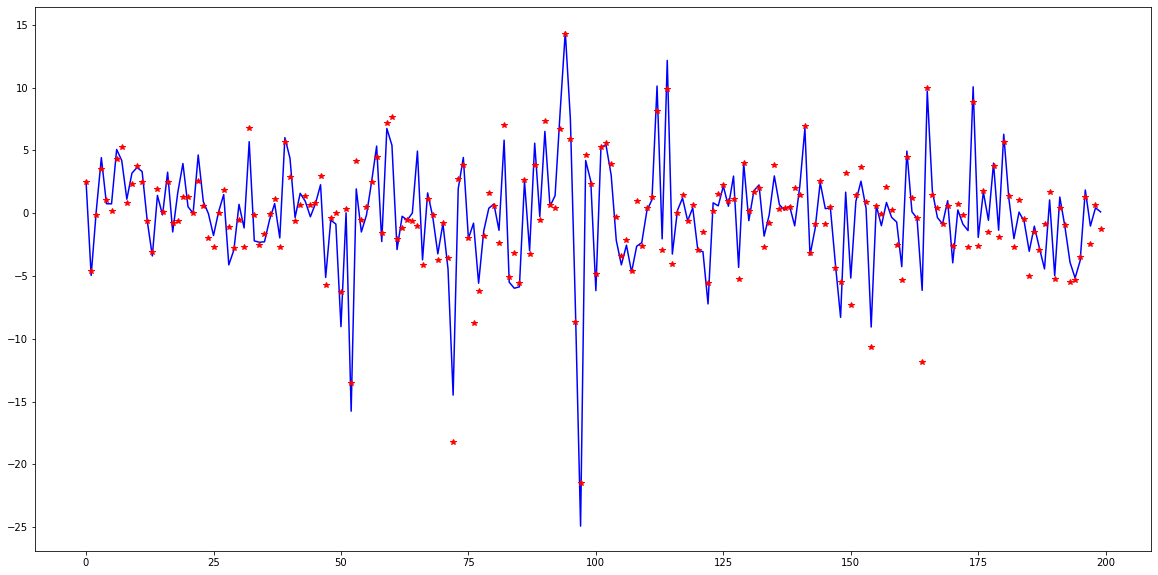

In [269]:
predictions = list()
for x in range(200):
    predictions.append(predict_with_ar_model_without_plot(0, x, 4))

pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions, linestyle = 'None', marker='*', color='red')
pyplot.show()

In [270]:
predictions_with_ar = predictions

In [271]:
def predict_with_updated_ar_model(stock, day, lags):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.ar_model import AutoReg

    X = series.values
    y = labels[day, stock]
    window = lags

    model = AutoReg(X, lags=lags, old_names=False)
    model_fit = model.fit()
    coef = model_fit.params
    
    history = X[len(X) - window:]
    history = [history[i] for i in range(len(history))]
    
    predictions = list()
    for t in range(25):
        length = len(history)
        lag = [history[i] for i in range(length - window, length)]
        prediction = coef[0]
        for d in range(window):
            prediction += coef[d + 1] * lag[window - d - 1]
        predictions.append(prediction)
        history.append(prediction)
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = np.hstack((X[-1], predictions))
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

prediction - 0.6828638801072509, expected - 0.83


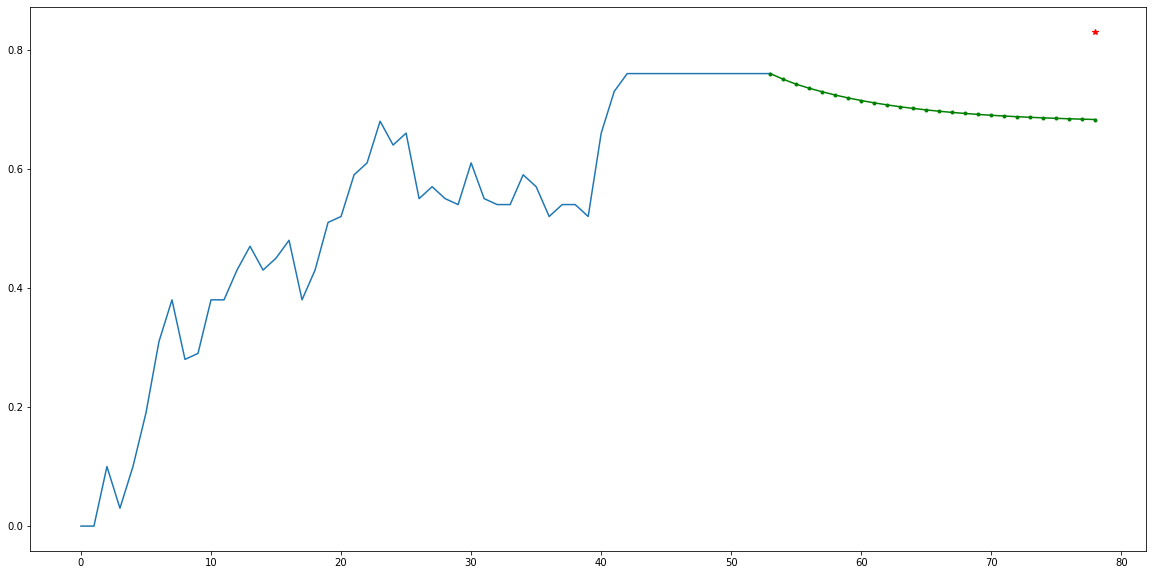

In [272]:
predict_with_updated_ar_model(190, 180, 4)

### ARIMA Model

In [273]:
import warnings

warnings.filterwarnings('ignore')

In [274]:
def predict_with_arima_model(stock, day, ar, ma):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.arima.model import ARIMA

    X = series.values
    y = labels[day, stock]

    history = [x for x in X]
    predictions = list()
    
    for x in range(25):
        model = ARIMA(history, order=(ar, 1, ma))
        model_fit = model.fit()
        prediction = model_fit.forecast()[0]
        predictions.append(prediction)
        history.append(prediction)
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = np.hstack((X[-1], predictions))
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

In [ ]:
predict_with_arima_model(0, 0, 3)

In [ ]:
predict_with_arima_model(0, 10, 15)

prediction - 0.76, expected - 0.83


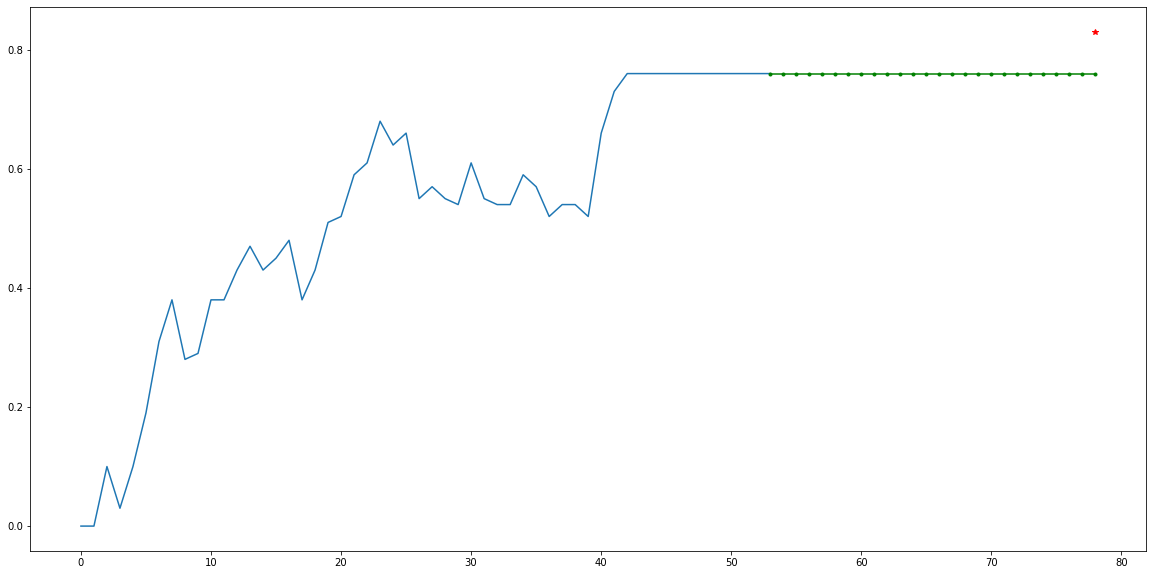

In [275]:
predict_with_arima_model(190, 180, 4, 0)

prediction - 0.8986416935865386, expected - 0.83


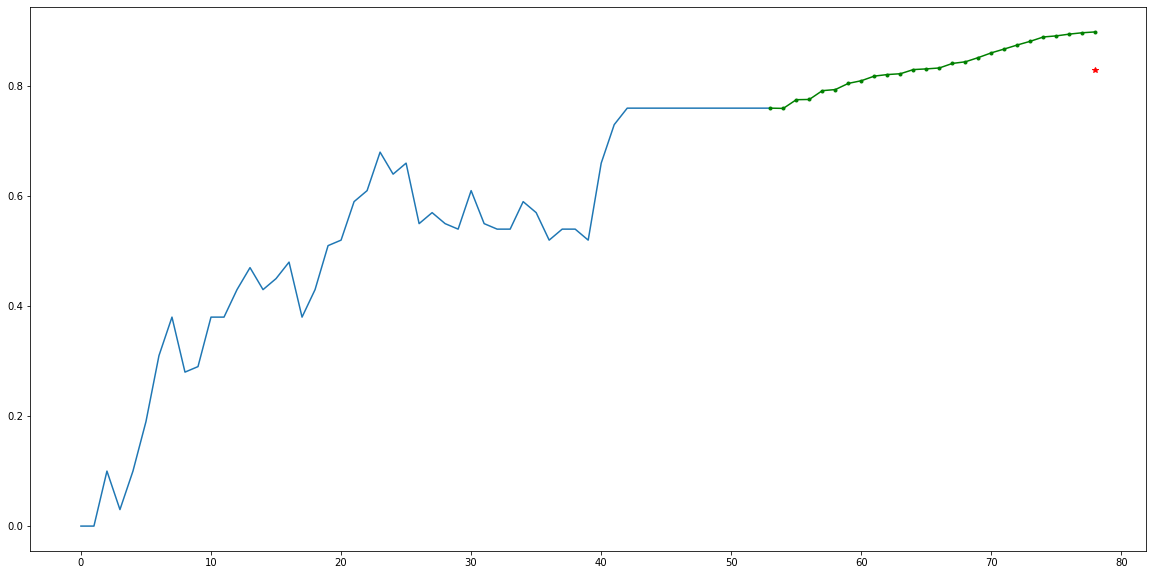

In [276]:
predict_with_arima_model(190, 180, 4, 2)

prediction - 0.9714918303162252, expected - 0.83


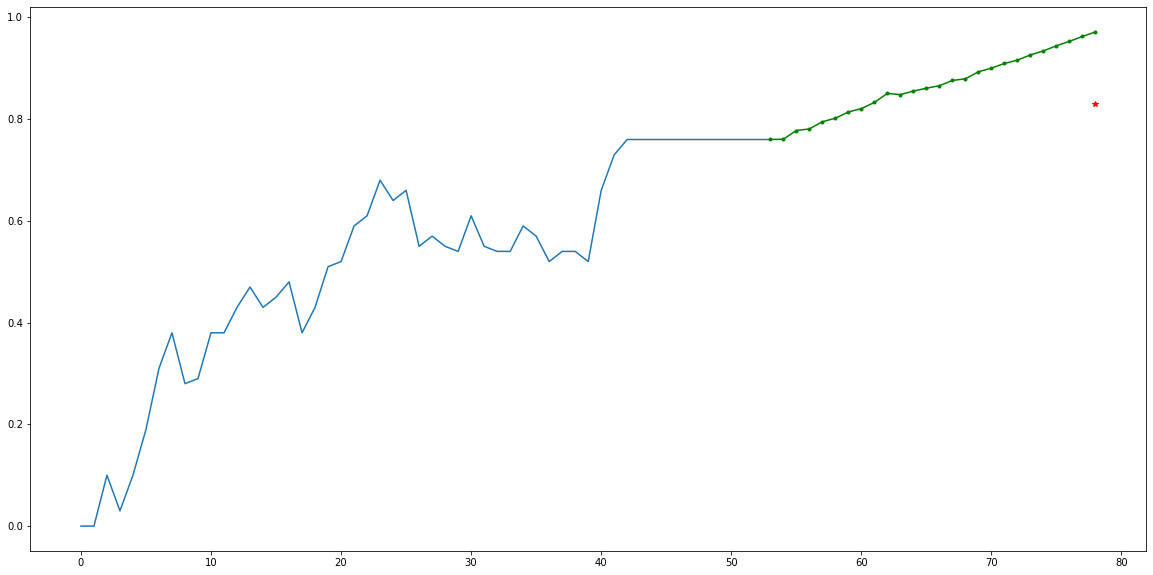

In [277]:
predict_with_arima_model(190, 180, 4, 4)

In [278]:
def predict_with_arima_model_without_plot(stock, day, ar, ma):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.arima.model import ARIMA

    X = series.values
    y = labels[day, stock]

    history = [x for x in X]
    predictions = list()
    
    for x in range(25):
        model = ARIMA(history, order=(ar, 1, ma))
        model_fit = model.fit()
        prediction = model_fit.forecast()[0]
        predictions.append(prediction)
        history.append(prediction)

    return predictions[-1]    

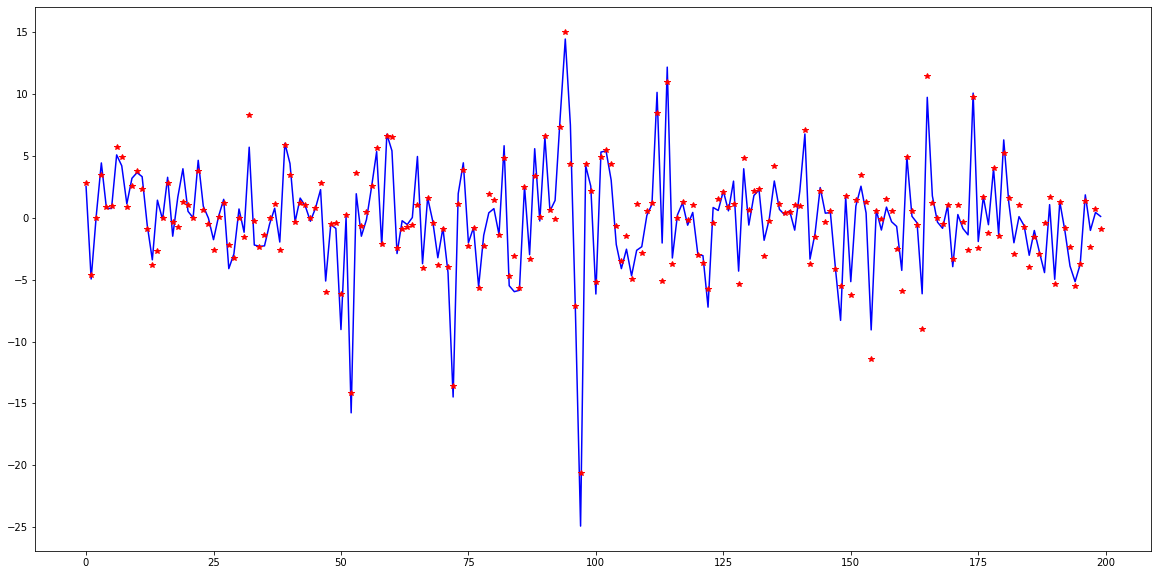

In [279]:
predictions = list()
for x in range(200):
    predictions.append(predict_with_arima_model_without_plot(0, x, 4, 1))

pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions, linestyle = 'None', marker='*', color='red')
pyplot.show()

In [280]:
predictions_with_arima = predictions

### Linear Model

In [299]:
train_last = [train[x][54, :] for x in range(len(train))]
test_last = [test[x][54, :] for x in range(len(test))]

In [300]:
print(type(train_last[0]))
print(train_last[0].shape)

<class 'numpy.ndarray'>
(442,)


In [301]:
df = pd.DataFrame(train_last)
df

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,2.78,0.77,0.10,0.09,-0.14,0.77,1.33,1.51,1.72,1.05,...,0.500000,0.758230,0.706056,0.798869,0.109697,0.194109,0.040000,0.259782,0.121326,0.124544
1,-4.62,0.06,-0.22,-0.04,-0.81,0.66,0.88,0.70,0.82,0.58,...,0.355662,0.490292,0.534405,0.659364,0.090437,0.176633,0.023094,0.225328,0.048442,0.083666
2,0.02,0.13,0.18,-0.12,-0.04,0.42,0.33,0.03,0.26,-0.11,...,0.281782,0.619862,0.595300,0.555556,0.081054,0.077272,0.030551,0.174681,0.061210,0.060000
3,3.79,-0.53,-0.22,-0.21,-0.61,-0.27,3.16,0.84,0.05,2.00,...,0.323910,0.661859,0.186396,0.244135,0.164887,0.262329,0.075719,0.288960,0.098319,0.128106
4,0.83,0.25,0.08,0.07,-0.18,0.14,-0.47,0.57,-0.05,0.10,...,0.355662,0.130888,0.191393,0.211461,0.080660,0.082128,0.034641,0.125018,0.043205,0.088569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-3.84,-0.06,0.00,0.11,-0.31,0.26,-1.04,-0.94,-0.26,-0.74,...,0.355662,0.240161,0.486932,0.597484,0.172855,0.347036,0.046188,0.420934,0.063770,0.176667
196,1.38,0.44,0.12,-0.11,0.40,0.30,0.94,0.90,0.88,0.89,...,0.430662,0.767052,0.309020,0.402862,0.163039,0.465480,0.072111,0.486796,0.117813,0.160139
197,-2.42,1.27,0.53,0.01,1.01,0.83,1.09,1.73,1.67,1.62,...,0.211325,0.501683,0.179962,0.084905,0.149454,0.146017,0.080829,0.185629,0.059889,0.054874
198,0.97,-0.18,-0.04,0.29,-0.24,-0.21,-0.60,0.19,-0.67,1.70,...,0.533113,0.648988,0.455243,0.571507,0.289932,0.259944,0.050332,0.298542,0.037238,0.132077


In [302]:
columns = df.columns
to_select_columns = [columns[0]] + [_ for _ in columns[198:]]

X = df[to_select_columns]
y = labels[:, 0]

In [304]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe = rfe.fit(X, y)

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

In [305]:
final_columns = [column for column, selected in zip(to_select_columns, Selected_Features_Support) if selected]
final_columns = [0] + final_columns
print(final_columns)

[0, 225, 293, 295, 296, 297]


In [306]:
X = df[final_columns]
y = labels[:, 0]
yy = y - X[0]

In [307]:
model = LinearRegression()

In [308]:
from sklearn.model_selection import KFold

n_folds = 6
sk = KFold(n_folds)
sk.get_n_splits(X, yy)

predictions = np.zeros(len(yy))

for train_idx, test_idx in sk.split(X, yy):
    train_X, test_X = X.iloc[train_idx].values, X.iloc[test_idx].values
    train_y, test_y = yy[train_idx], yy[test_idx]
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    predictions[test_idx] = prediction + test_X[:, 0]

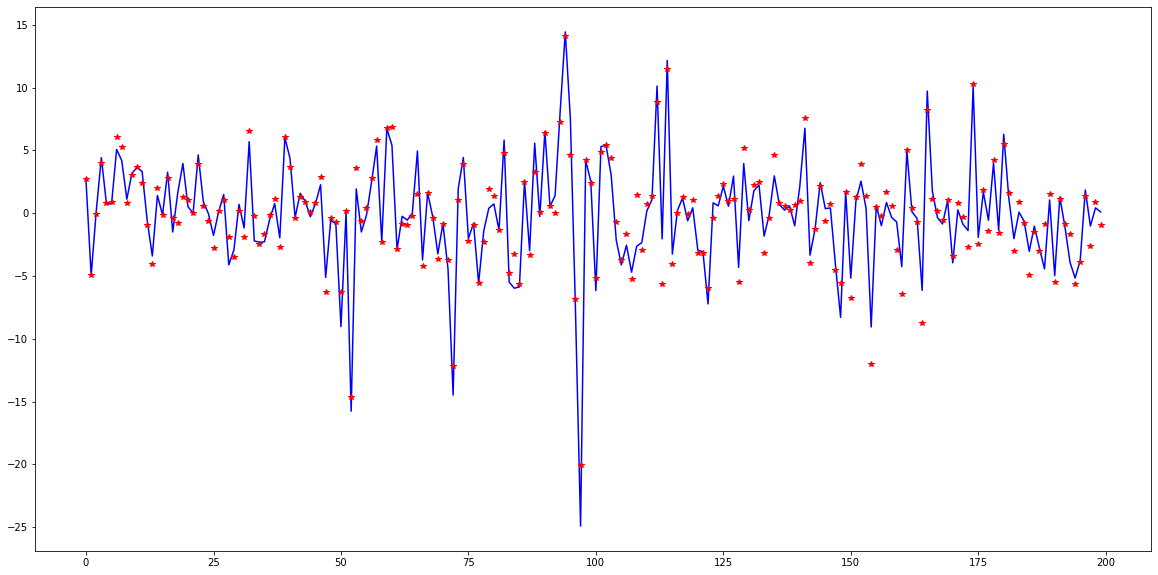

In [309]:
pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions, linestyle = 'None', marker='*', color='red')
pyplot.show()

In [310]:
predictions_with_linr = predictions

In [311]:
X = df[final_columns]
y = labels[:, 0]

In [312]:
from sklearn.model_selection import KFold

n_folds = 6
sk = KFold(n_folds)
sk.get_n_splits(X, y)

predictions = np.zeros(len(y))

for train_idx, test_idx in sk.split(X, y):
    train_X, test_X = X.iloc[train_idx].values, X.iloc[test_idx].values
    train_y, test_y = y[train_idx], y[test_idx]
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    predictions[test_idx] = prediction

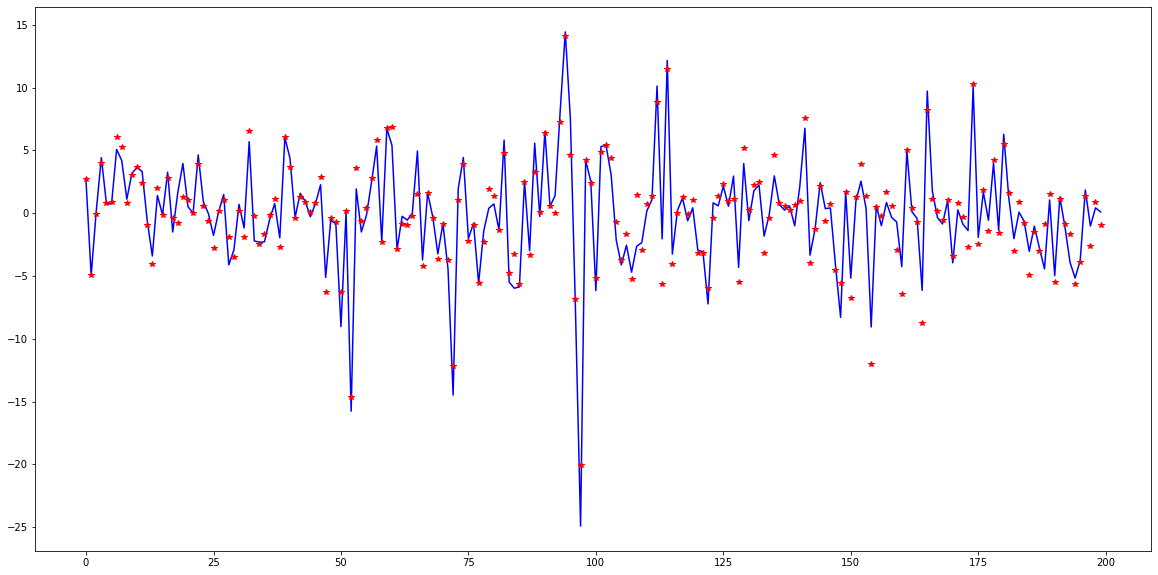

In [313]:
pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions, linestyle = 'None', marker='*', color='red')
pyplot.show()

In [314]:
predictions_with_linr_for_diff = predictions

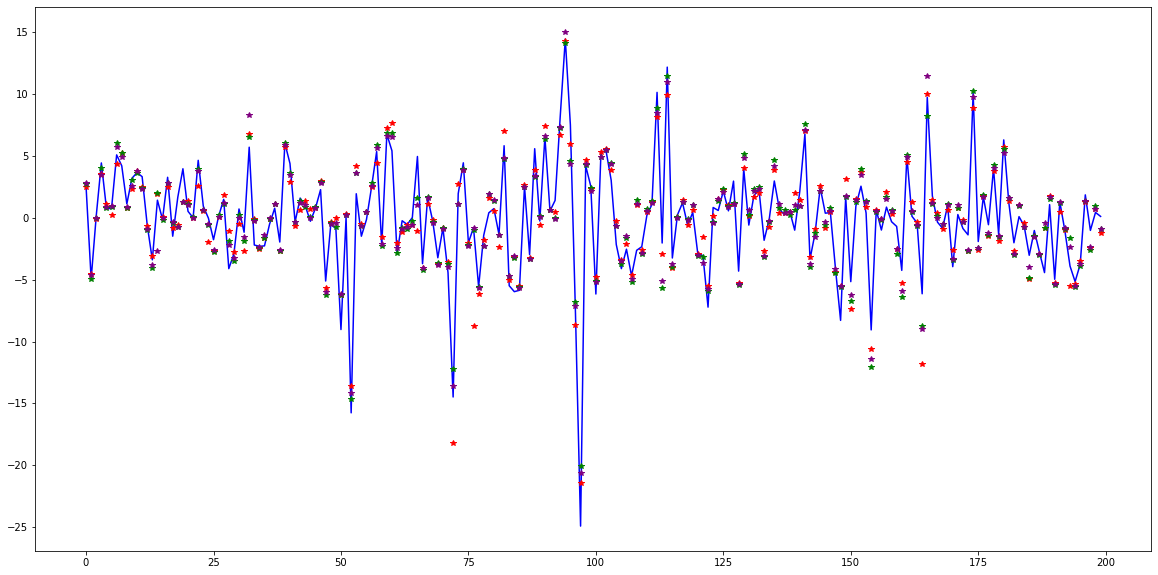

In [315]:
pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions_with_ar, linestyle = 'None', marker='*', color='red')
pyplot.plot(predictions_with_linr, linestyle = 'None', marker='*', color='green')
pyplot.plot(predictions_with_arima, linestyle = 'None', marker='*', color='purple')
pyplot.show()

### Result

In [316]:
for x in range(len(train)):
    print("predict with ar - {:0.3f}, predict with arima - {:0.3f}, predict with linr - {:0.3f}, predict with linr for diff - {:0.3f}, expected - {:0.3f}".format(predictions_with_ar[x], predictions_with_arima[x], predictions_with_linr[x], predictions_with_linr_for_diff[x], y[x]))

predict with ar - 2.462, predict with arima - 2.779, predict with linr - 2.766, predict with linr for diff - 2.766, expected - 2.530
predict with ar - -4.564, predict with arima - -4.625, predict with linr - -4.939, predict with linr for diff - -4.939, expected - -4.950
predict with ar - -0.123, predict with arima - 0.019, predict with linr - -0.037, predict with linr for diff - -0.037, expected - 0.160
predict with ar - 3.510, predict with arima - 3.472, predict with linr - 3.995, predict with linr for diff - 3.995, expected - 4.430
predict with ar - 1.077, predict with arima - 0.857, predict with linr - 0.802, predict with linr for diff - 0.802, expected - 0.760
predict with ar - 0.199, predict with arima - 0.927, predict with linr - 0.909, predict with linr for diff - 0.909, expected - 0.750
predict with ar - 4.318, predict with arima - 5.710, predict with linr - 6.047, predict with linr for diff - 6.047, expected - 5.080
predict with ar - 5.245, predict with arima - 4.931, predict 

In [317]:
from sklearn.metrics import mean_squared_error

ar_mse = mean_squared_error(y, predictions_with_ar)
arima_mse = mean_squared_error(y, predictions_with_arima)
linr_mse = mean_squared_error(y, predictions_with_linr)
linr_for_diff_mse = mean_squared_error(y, predictions_with_linr_for_diff)

print("ar mse - {}, arima_mse - {}, linr mse - {}, linr for diff mse - {}".format(ar_mse, arima_mse, linr_mse, linr_for_diff_mse))

ar mse - 1.9167418220477308, arima_mse - 1.3263867820721646, linr mse - 1.307458001988142, linr for diff mse - 1.3074580019881412


In [318]:
from sklearn.metrics import mean_absolute_error

ar_mae = mean_absolute_error(y, predictions_with_ar)
arima_mae = mean_absolute_error(y, predictions_with_arima)
linr_mae = mean_absolute_error(y, predictions_with_linr)
linr_for_diff_mae = mean_absolute_error(y, predictions_with_linr_for_diff)

print("ar mae - {}, arima_mae - {}, linr mae - {}, linr for diff mae - {}".format(ar_mae, arima_mae, linr_mae, linr_for_diff_mae))

ar mae - 0.9021675113413332, arima_mae - 0.7749781967587053, linr mae - 0.7815418609611965, linr for diff mae - 0.7815418609611965


# Summary

#### Test Result Table

DATA | MODEL | MAE | MSE
-|-|-|-
battlefin|AR|0.902|1.917
battlefin|ARIMA|0.775|1.326
battlefin|LINR|0.782|1.307
battlefin|LINR with Diff|0.782|1.207


# Deep Learning Model

In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt

## RNNs Model

### Data PreProcess

In [129]:
def prepare_data(data, stock, day, timestep, model):
    if model == "bystock":
        return prepare_data_by_stock(data, stock, timestep)
    elif model == "byday":
        return prepare_data_by_day(data, day, timestep)

In [130]:
def prepare_data_by_stock(data, stock, timestep):
    data = data[stock][:, 1:]
    for day in range(0, data.shape[0]):
        day_data = data[day, :]

        X_combination = None
        y_combination = None

        count = 0
        for timestamp in range(0, data.shape[1] - (2 * timestep) + 1):
            count += 1

            X_start = timestamp
            X_end = timestamp + timestep
            y_start = timestamp + timestep
            y_end = timestamp + 2 * timestep

            if timestamp == 0:
                X_combination = day_data[X_start:X_end]
                y_combination = day_data[y_start:y_end]
            else:
                X_combination = np.vstack((X_combination, day_data[X_start:X_end]))
                y_combination = np.vstack((y_combination, day_data[y_start:y_end]))
       
        X_stock = np.reshape(X_combination, (count, timestep, 1))
        y_stock = np.reshape(y_combination, (count, timestep, 1))
    
        if day == 0:
            X = X_stock
            y = y_stock
        else:
            X = np.concatenate((X, X_stock), axis=0)
            y = np.concatenate((y, y_stock), axis=0)
    
    return X, y

In [131]:
def prepare_data_by_day(data, day, timestep):
    for stock in range(len(data)):
        stock_data = data[stock][day, 1:]
        
        X_combination = None
        y_combination = None

        count = 0
        for timestamp in range(0, len(stock_data) - (2 * timestep) + 1):
            count += 1

            X_start = timestamp
            X_end = timestamp + timestep
            y_start = timestamp + timestep
            y_end = timestamp + 2 * timestep

            if timestamp == 0:
                X_combination = stock_data[X_start:X_end]
                y_combination = stock_data[y_start:y_end]        
            else:
                X_combination = np.vstack((X_combination, stock_data[X_start:X_end]))
                y_combination = np.vstack((y_combination, stock_data[y_start:y_end]))
       
        X_day = np.reshape(X_combination, (count, timestep, 1))
        y_day = np.reshape(y_combination, (count, timestep, 1))
    
        if stock == 0:
            X = X_day
            y = y_day
        else:
            X = np.concatenate((X, X_day), axis=0)
            y = np.concatenate((y, y_day), axis=0)
    
    return X, y

### Functions

In [132]:
def plot_history(history):
    plt.figure(figsize=(20, 10))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xticks(range(0, len(history['loss'] + 1)))
    plt.plot(history['loss'], label="training", marker='o')
    plt.plot(history['val_loss'], label="validation", marker='o')
    plt.legend()
    plt.show()

### Build GRU Model

In [249]:
def build_compile_and_fit_model(X_train, y_train, silent=False):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=64, activation='tanh', recurrent_activation='sigmoid', stateful=False)))
    model.add(tf.keras.layers.RepeatVector(X_train.shape[1]))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=64, activation='tanh', recurrent_activation='sigmoid', stateful=False, return_sequences=True)))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1, activation='linear')))
    
    if silent == False:
        model.summary()
    
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['MeanSquaredError']
    )
    
    if silent == True:
        verbose = False
    else:
        verbose = True
    
    history = model.fit(
        X_train,
        y_train,
        batch_size=47,
        epochs=5,
        verbose=verbose,
        validation_split=0.2
    )
    
    if silent == False:
        history = pd.DataFrame(history.history)
        plot_history(history)
    
    return model

In [250]:
def predict_with_gru_model(stock, day, model, timestep=timestep):
    X = train_ar[stock][day, 1:]
    y = labels[day, stock]
    window = timestep
    
    history = X[-window:]
    
    predictions = []
    steps = (25 - 1) // timestep
    idx = (25 - 1) % timestep
    for t in range(steps + 1):
        history = history[-window:]
        prediction = model.predict(np.reshape(history, (1, window, 1)))
        if t == steps:
            for p in range(idx + 1):
                predictions.append(prediction[0][p][0])
        else:
            for p in range(timestep):
                predictions.append(prediction[0][p][0])
                
        history = prediction[0]
        
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = [X[-1]] + predictions
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    series = pd.Series(X)
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

In [251]:
def predict_with_gru_model_without_plot(stock, day, model, timestep=timestep):
    X = train_ar[stock][day, 1:]
    y = labels[day, stock]
    window = timestep
    
    history = X[-window:]
    
    predictions = []
    steps = (25 - 1) // timestep
    idx = (25 - 1) % timestep
    for t in range(steps + 1):
        history = history[-window:]
        prediction = model.predict(np.reshape(history, (1, window, 1)), verbose=False)
        if t == steps:
            for p in range(idx + 1):
                predictions.append(prediction[0][p][0])
        else:
            for p in range(timestep):
                predictions.append(prediction[0][p][0])
                
        history = prediction[0]
        
    return predictions[-1]

### Build Model by the Stock 0 Data in Training Days

In [252]:
stock = 0
timestep = 12

X_train, y_train = prepare_data_by_stock(data=train_ar, stock=stock, timestep=timestep)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              25728     
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 12, 128)          0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 128)          74496     
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 12, 1)            129       
 ibuted)                                                         
                                                                 
Total params: 100,353
Trainable params: 100,353
Non-trai

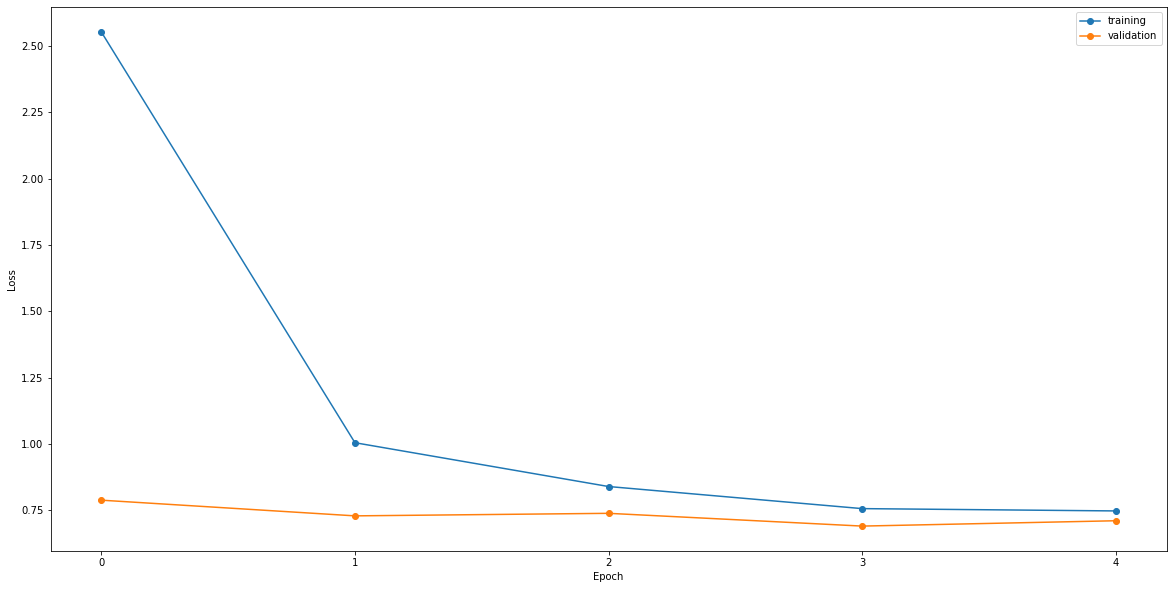

In [253]:
model = build_compile_and_fit_model(X_train, y_train)

1/1 [==============================] - 0s 21ms/step
prediction - 2.591191291809082, expected - 2.53


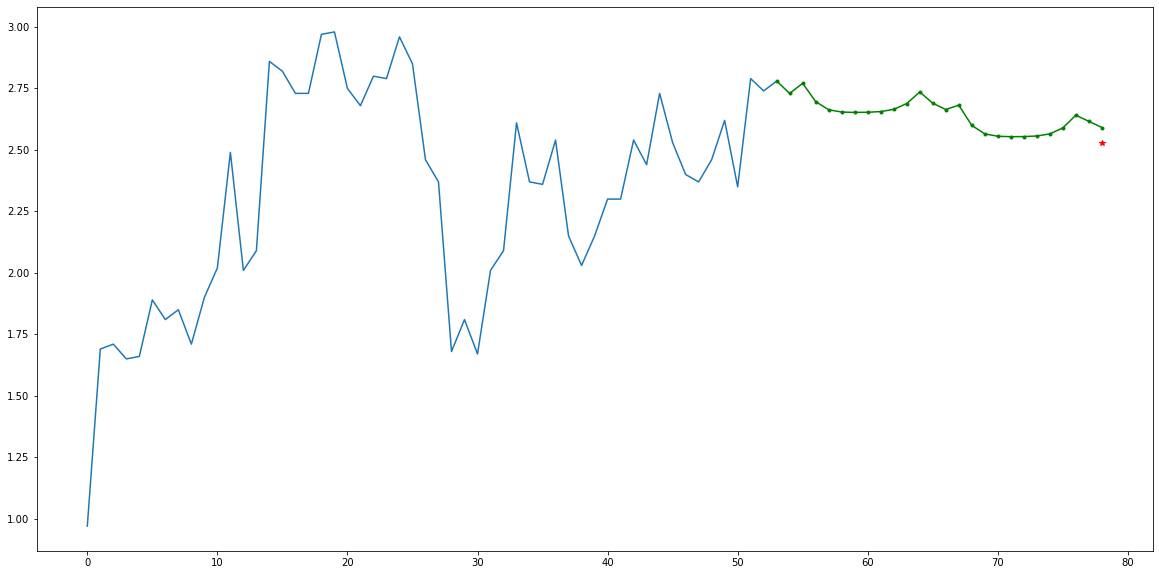

In [254]:
predict_with_gru_model(0, 0, model, timestep)

1/1 [==============================] - 0s 21ms/step
prediction - 3.5282254219055176, expected - 3.65


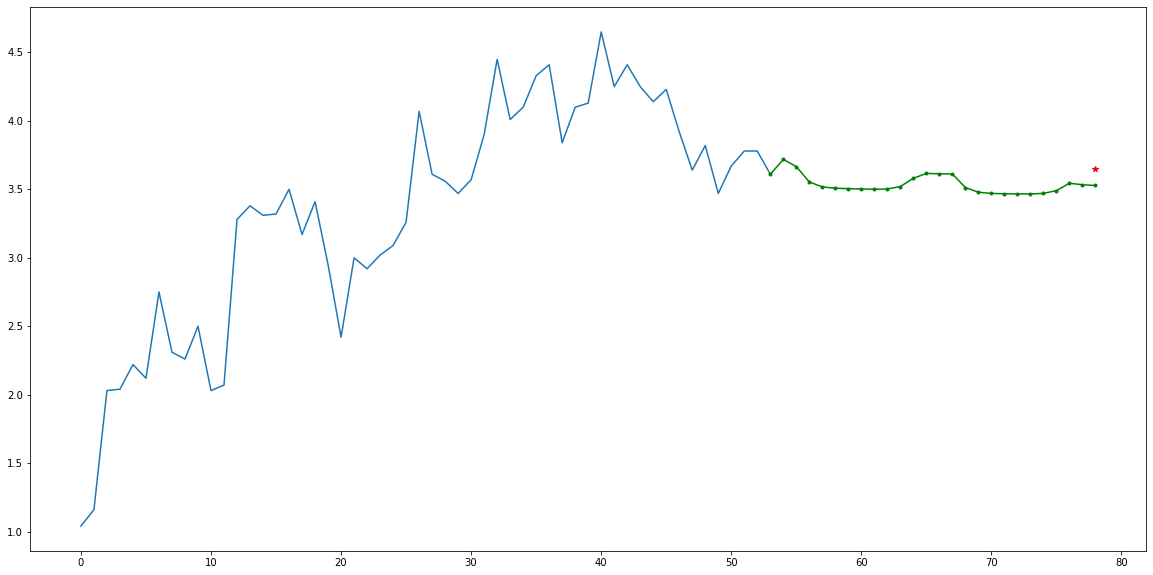

In [255]:
predict_with_gru_model(0, 10, model, timestep)

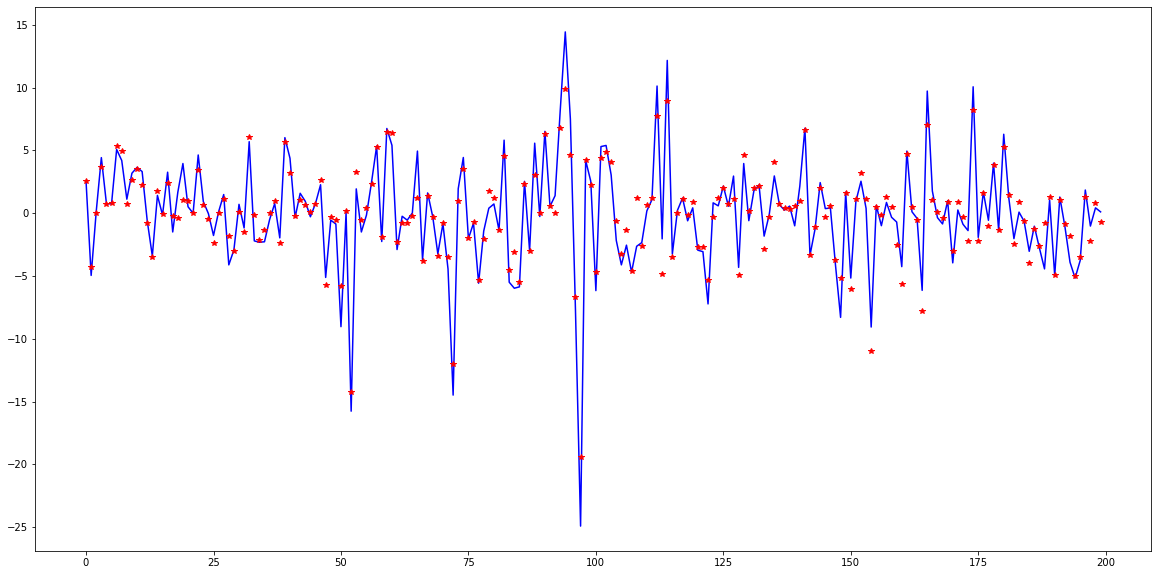

In [256]:
predictions = list()
for x in range(200):
    predictions.append(predict_with_gru_model_without_plot(0, x, model, timestep))

pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions, linestyle = 'None', marker='*', color='red')
pyplot.show()

In [257]:
predictions_with_gru_by_stock = predictions
y = labels[:, 0]

In [258]:
from sklearn.metrics import mean_squared_error

gru_by_stock_mse = mean_squared_error(y, predictions_with_gru_by_stock)
print("gru by stock mse - {}".format(gru_by_stock_mse))

gru by stock mse - 1.4395220670652948


In [259]:
from sklearn.metrics import mean_absolute_error

gru_by_stock_mae = mean_absolute_error(y, predictions_with_gru_by_stock)
print("gru by stock mae - {}".format(gru_by_stock_mae))

gru by stock mae - 0.7787102087758481


### Build Model by the Stock Data in Everyday Days

In [194]:
day = 0
timestep = 12

X_train, y_train = prepare_data_by_day(data=train_ar, day=day, timestep=timestep)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               6720      
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 12, 64)           0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 64)           18816     
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 12, 1)            65        
 ibuted)                                                         
                                                                 
Total params: 25,601
Trainable params: 25,601
Non-traina

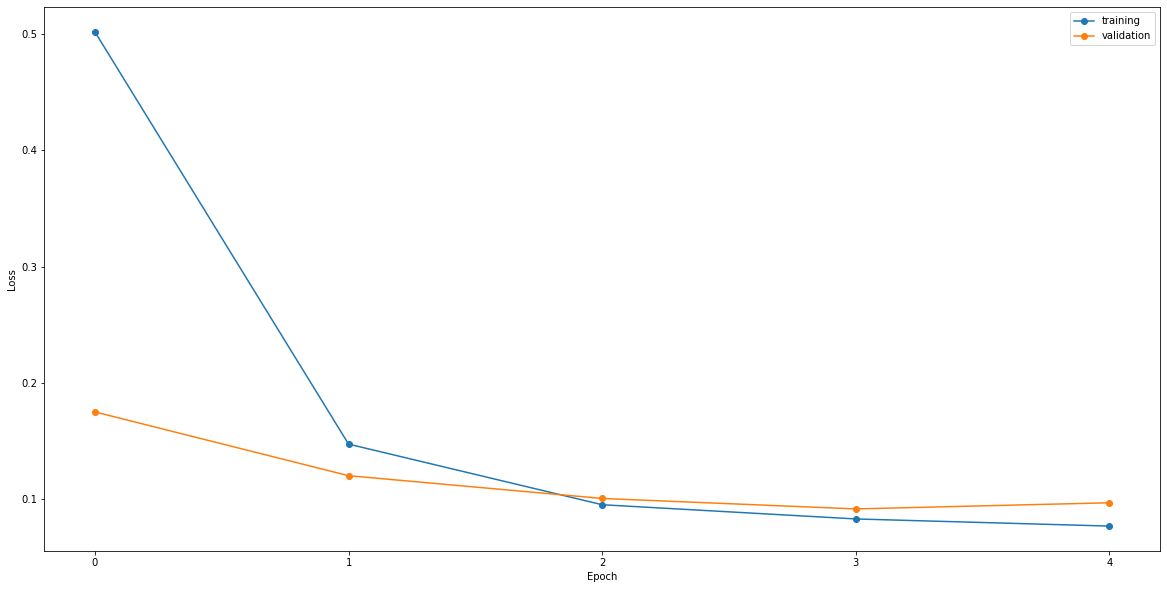

In [195]:
model = build_compile_and_fit_model(X_train, y_train)

1/1 [==============================] - 0s 21ms/step
prediction - 2.7770044803619385, expected - 2.53


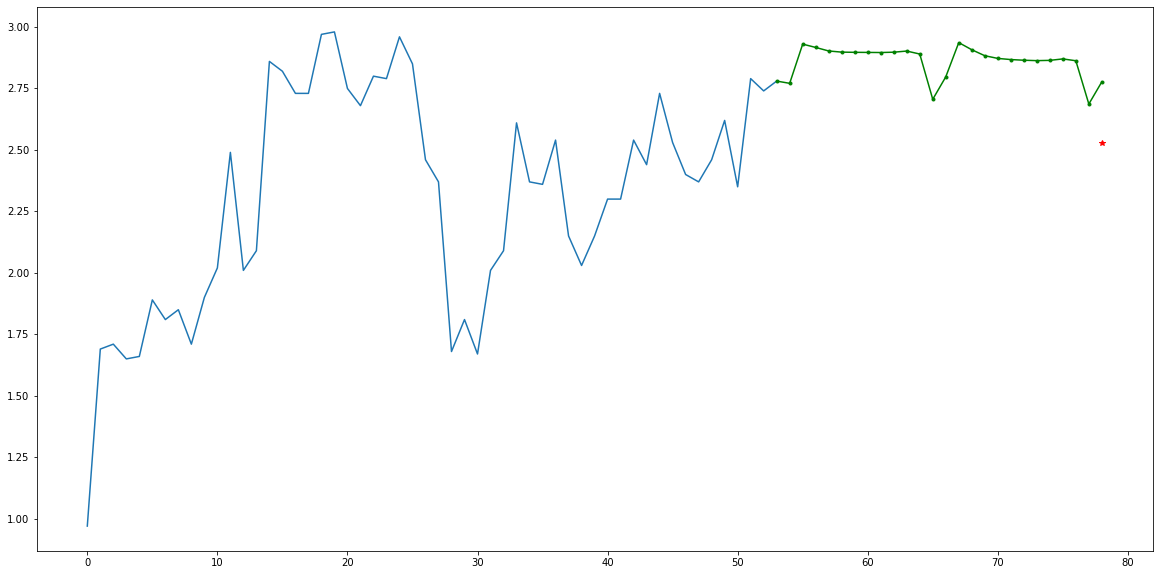

In [196]:
predict_with_gru_model(0, 0, model, timestep)

Train day - 0
Train day - 1
Train day - 2
Train day - 3
Train day - 4
Train day - 5
Train day - 6
Train day - 7
Train day - 8
Train day - 9
Train day - 10
Train day - 11
Train day - 12
Train day - 13
Train day - 14
Train day - 15
Train day - 16
Train day - 17
Train day - 18
Train day - 19
Train day - 20
Train day - 21
Train day - 22
Train day - 23
Train day - 24
Train day - 25
Train day - 26
Train day - 27
Train day - 28
Train day - 29
Train day - 30
Train day - 31
Train day - 32
Train day - 33
Train day - 34
Train day - 35
Train day - 36
Train day - 37
Train day - 38
Train day - 39
Train day - 40
Train day - 41
Train day - 42
Train day - 43
Train day - 44
Train day - 45
Train day - 46
Train day - 47
Train day - 48
Train day - 49
Train day - 50
Train day - 51
Train day - 52
Train day - 53
Train day - 54
Train day - 55
Train day - 56
Train day - 57
Train day - 58
Train day - 59
Train day - 60
Train day - 61
Train day - 62
Train day - 63
Train day - 64
Train day - 65
Train day - 66
Train

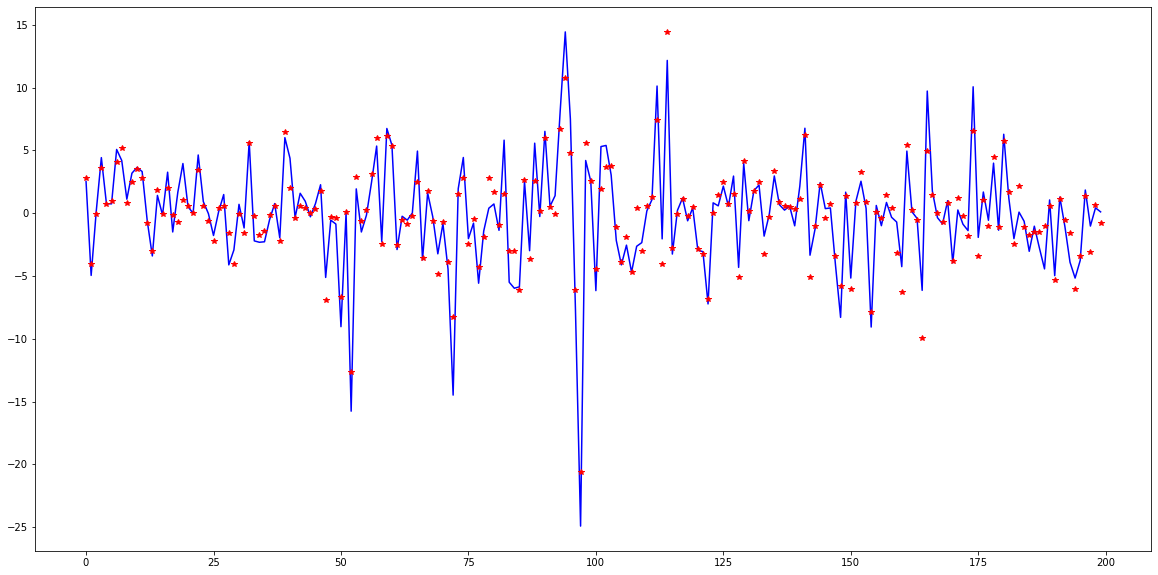

In [202]:
predictions = list()
for day in range(200):
    print("Train day - {}".format(day))
    X_train, y_train = prepare_data_by_day(data=train, day=day, timestep=timestep)
    model = build_compile_and_fit_model(X_train, y_train, silent=True)
    predictions.append(predict_with_gru_model_without_plot(0, day, model, timestep))

pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions, linestyle = 'None', marker='*', color='red')
pyplot.show()

In [203]:
predictions_with_gru_by_day = predictions
y = labels[:200, 0]

In [205]:
from sklearn.metrics import mean_squared_error

gru_by_day_mse = mean_squared_error(y, predictions_with_gru_by_day)
print("gru by day mse - {}".format(gru_by_day_mse))

gru by day mse - 1.9478805270642716


In [206]:
from sklearn.metrics import mean_absolute_error

gru_by_day_mae = mean_absolute_error(y, predictions_with_gru_by_day)
print("gru by day mae - {}".format(gru_by_day_mae))

gru by day mae - 0.9401177932064979


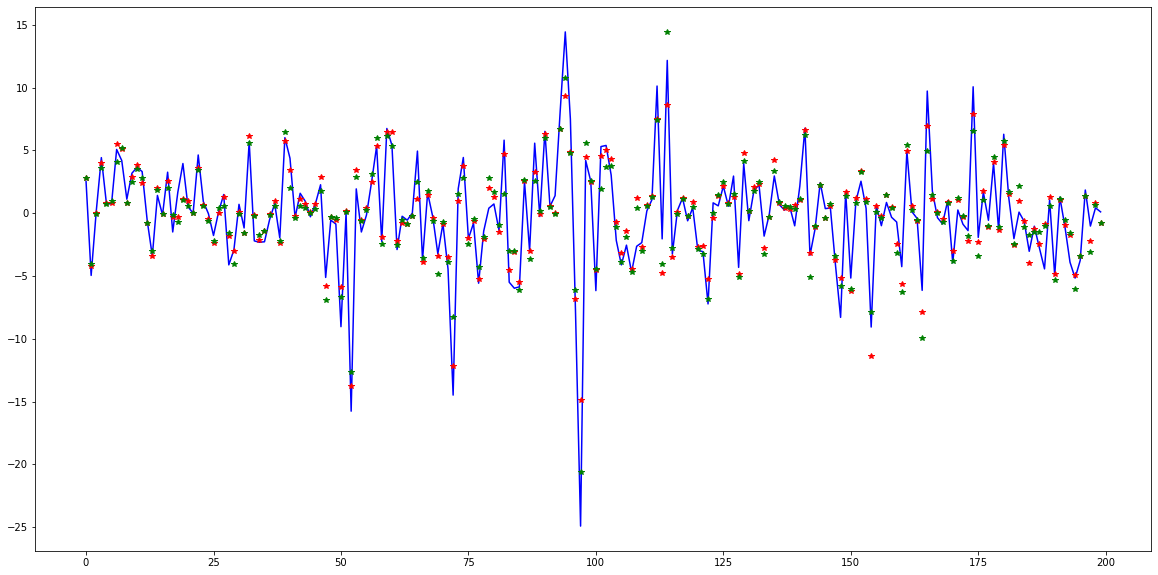

In [217]:
pyplot.figure(figsize=(20, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions_with_gru_by_stock, linestyle = 'None', marker='*', color='red')
pyplot.plot(predictions_with_gru_by_day, linestyle = 'None', marker='*', color='green')
pyplot.show()

## Summary

#### Test Result Table

DATA | MODEL | FE | GRUs | MAE | MSE
-|-|-|-|-|-
battlefin|RNNs-GRU|By Stock|32|0.814|1.849
battlefin|RNNs-GRU|By Stock|64|0.81|1.5
battlefin|RNNs-GRU|By Stock|128|0.829|1.567
battlefin|RNNs-GRU|By Day|32|0.940|1.948